In [1]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
K = 4# aquile estamos diciendo cuantos clusters hay, hay algoritmo para ver cuantos clusters haces (Elbow plot)[facil]

X = np.zeros([100*K,2]) #Para que solo tengan 2 features
for i in range(K*100):
    if i < 100:
        a = 3.7
    if 100 <= i < 200:
        a = 4.3
    if 200 <= i < 300:
        a = 5
    if i >= 300:
        a = 5.7
    x = (a)+random.rand(1, 2)
    X[i] = x
    

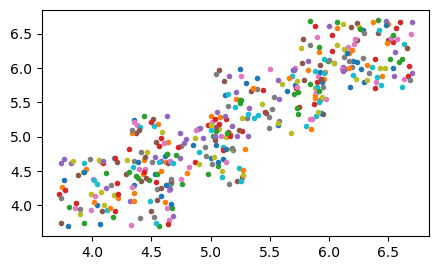

In [3]:
plot0 = plt.figure(0,figsize=(5,3), dpi=100)
for i in range(K*100):
    plt.plot(X[i][0],X[i][1],".")

In [4]:
# Si son muchos feautres (tipo time s)esta facil modificar codigo, en si solito lo agarrara porque tendras matriz de Nxp
# Solo recuerda que si quieres metrle dif valor de k hay que metrle mas index y centroids

N = len(X) # number of observations
p = len(X[0]) # number of features

assignment = np.random.randint(4, size=N)+1 # asignando a cada observation un cluster random
centroids = np.zeros([K,p]) #mean de cada coordenada de cada cluster
memory = np.zeros([2,len(assignment)])

exit = 0
while exit == 0:
    memory[0] = assignment
    
    index_1 = []
    index_2 = []
    index_3 = []
    index_4 = []
    for i in range(N):
        if assignment[i] == 1:
            index_1.append(X[i])
        if assignment[i] == 2:
            index_2.append(X[i])
        if assignment[i] == 3:
            index_3.append(X[i])
        if assignment[i] == 4:
            index_4.append(X[i])
            
    centroids[0] = np.mean(index_1, axis = 0)
    centroids[1] = np.mean(index_2, axis = 0)
    centroids[2] = np.mean(index_3, axis = 0)
    centroids[3] = np.mean(index_4, axis = 0)
    for i in range(N):
        d = np.zeros(4)
        for j in range(K):
            for r in range(p):
                d[j] = d[j] + (X[i][r]-centroids[j][r])**2
            d[j] = np.sqrt(d[j])
        m = np.where(d == np.amin(d))
        assignment[i] = m[0]+1
    memory[1] = assignment
    if np.array_equal(memory[0], memory[1]):
        exit = 1

    

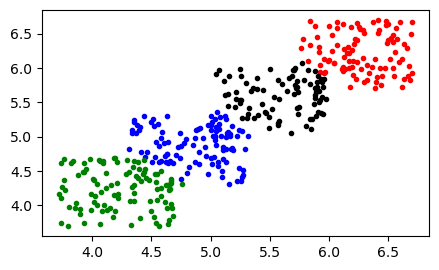

In [5]:
plot0 = plt.figure(0,figsize=(5,3), dpi=100)
for i in range(len(index_1)):
    plt.plot(index_1[i][0],index_1[i][1],"r.")
for i in range(len(index_2)):
    plt.plot(index_2[i][0],index_2[i][1],"b.")
for i in range(len(index_3)):
    plt.plot(index_3[i][0],index_3[i][1],"k.")
for i in range(len(index_4)):
    plt.plot(index_4[i][0],index_4[i][1],"g.")

